<a href="https://colab.research.google.com/github/neesarg123/Devanagri-Letters-DL/blob/main/Deep_GAN_Model_for_Augmenting_Data_for_Devanagari_Letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Convolutional Generative Adversarial Network

## Loading the data into the session

In [ ]:
import os

if not os.path.isdir('/content/Dataset'):
   !unzip "/content/drive/MyDrive/Devanagari Letters/DevanagariHandwrittenCharacterDataset.zip" -d "/content/Dataset/"

Streaming output truncated to the last 5000 lines.
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/104096.png  
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/104099.png  
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/104101.png  
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/12716.png  
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/12723.png  
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/12724.png  
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/12725.png  
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/12726.png  
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/12727.png  
 extracting: /content/Dataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/12731.png  
 extra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Understanding the Dataset and its Data

### Dataset


1.   Number of Classes: 46
2.   Total number of images: 92,000 >>> 72, 000 images in consonant datasest and 20, 000 images in numeral dataset.
3. Training: 78,200 images (each class has 1,700)
4. Testing: 13,800 images (each class has 300) 



In [ ]:
# how many total classes are there
nclasses = len(os.listdir('/content/Dataset/DevanagariHandwrittenCharacterDataset/Train'))

# names of the classes
classes = [sub_dir for sub_dir in os.listdir('/content/Dataset/DevanagariHandwrittenCharacterDataset/Train')]

print("Number of classes:", nclasses)
print("Classes:", classes)

Number of classes: 46
Classes: ['character_12_thaa', 'digit_7', 'digit_9', 'character_18_da', 'character_2_kha', 'character_3_ga', 'character_31_petchiryakha', 'character_5_kna', 'character_23_ba', 'character_6_cha', 'character_30_motosaw', 'character_19_dha', 'digit_4', 'character_13_daa', 'character_25_ma', 'character_27_ra', 'character_24_bha', 'character_7_chha', 'character_11_taamatar', 'character_21_pa', 'character_4_gha', 'digit_0', 'character_17_tha', 'character_16_tabala', 'character_8_ja', 'character_28_la', 'digit_2', 'character_15_adna', 'character_33_ha', 'character_14_dhaa', 'digit_3', 'character_29_waw', 'character_9_jha', 'character_1_ka', 'character_36_gya', 'digit_6', 'digit_8', 'digit_5', 'character_35_tra', 'character_20_na', 'digit_1', 'character_34_chhya', 'character_26_yaw', 'character_22_pha', 'character_10_yna', 'character_32_patalosaw']


In [ ]:
# Number of images (in train of all classes)

for sub_dir, c in zip(os.listdir('/content/Dataset/DevanagariHandwrittenCharacterDataset/Train'), classes):
  print(c + ":", len(os.listdir(f'/content/Dataset/DevanagariHandwrittenCharacterDataset/Train/{sub_dir}')))

print("#######################################################################")

# same thing for test
for sub_dir, c in zip(os.listdir('/content/Dataset/DevanagariHandwrittenCharacterDataset/Test'), classes):
  print(c + ":", len(os.listdir(f'/content/Dataset/DevanagariHandwrittenCharacterDataset/Test/{sub_dir}')))


character_12_thaa: 1700
digit_7: 1700
digit_9: 1700
character_18_da: 1700
character_2_kha: 1700
character_3_ga: 1700
character_31_petchiryakha: 1700
character_5_kna: 1700
character_23_ba: 1700
character_6_cha: 1700
character_30_motosaw: 1700
character_19_dha: 1700
digit_4: 1700
character_13_daa: 1700
character_25_ma: 1700
character_27_ra: 1700
character_24_bha: 1700
character_7_chha: 1700
character_11_taamatar: 1700
character_21_pa: 1700
character_4_gha: 1700
digit_0: 1700
character_17_tha: 1700
character_16_tabala: 1700
character_8_ja: 1700
character_28_la: 1700
digit_2: 1700
character_15_adna: 1700
character_33_ha: 1700
character_14_dhaa: 1700
digit_3: 1700
character_29_waw: 1700
character_9_jha: 1700
character_1_ka: 1700
character_36_gya: 1700
digit_6: 1700
digit_8: 1700
digit_5: 1700
character_35_tra: 1700
character_20_na: 1700
digit_1: 1700
character_34_chhya: 1700
character_26_yaw: 1700
character_22_pha: 1700
character_10_yna: 1700
character_32_patalosaw: 1700
###################

### Images

1. Size: 32 x 32 pixels



Image Size: (32, 32) pixels


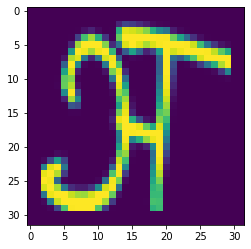

In [ ]:
# plotting one out to see it
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/Dataset/DevanagariHandwrittenCharacterDataset/Train/character_10_yna/10542.png')

plt.imshow(img)

print("Image Size:", img.size, "pixels")

In [ ]:
# converting from an image to a numpy array to see data type
import numpy as np

na = np.asarray(img)

print(na.dtype)
# the max element to check if the data is normalized already
print(np.max(np.asarray(img)))

uint8
255


# Training a GAN model to increase class images

### Loading the images into arrays

In [ ]:
import tensorflow as tf 

train_dir = '/content/Dataset/DevanagariHandwrittenCharacterDataset/Train'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=(32, 32), labels='inferred', color_mode="grayscale", batch_size=256, shuffle=True)

Found 78200 files belonging to 46 classes.


In [ ]:
batches = np.concatenate([b for b, _ in train_dataset], axis=0)
batches = (batches - 127.5) / 127.5  # Normalize the images to [-1, 1]
batches.shape

(78200, 32, 32, 1)

In [ ]:
BUFFER_SIZE = 78200

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(batches).shuffle(BUFFER_SIZE).batch(256)

train_dataset

<BatchDataset shapes: (None, 32, 32, 1), types: tf.float32>

### Building a generator

#### HYPERPARAMETERS

In [ ]:
leaky_alpha = 0.2 
batch_norm_momentum = 0.8
dense_1_multiplier = 256
dropout_rate = 0.3
lr = 1e-4
EPOCHS = 1000
BATCH_SIZE = 256

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD

def build_generator():
  NOISE_INPUT_SHAPE = (100, )

  model = Sequential()  # initiating a sequential model 

  model.add(Dense(8 * 8 * dense_1_multiplier, use_bias=False, input_shape=NOISE_INPUT_SHAPE))  # the first dense layer for inputs which are 32 x 32
  model.add(LeakyReLU(alpha=leaky_alpha)) 
  model.add(BatchNormalization(momentum=batch_norm_momentum))

  model.add(Reshape((8, 8, dense_1_multiplier)))
  assert model.output_shape == (None, 8, 8, dense_1_multiplier)  # Note: None is the batch size

  model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None, 8, 8, 128)
  model.add(LeakyReLU(alpha=leaky_alpha)) 
  model.add(BatchNormalization(momentum=batch_norm_momentum))

  model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 16, 16, 64)
  model.add(LeakyReLU(alpha=leaky_alpha)) 
  model.add(BatchNormalization(momentum=batch_norm_momentum))

  model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  assert model.output_shape == (None, 32, 32, 1)

  return model

#### generating a sample (UNTRAINED) image from generator

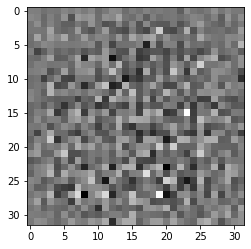

In [ ]:
generator = build_generator()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### Building a discriminator

In [ ]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 1]))
    model.add(LeakyReLU(alpha=leaky_alpha))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=leaky_alpha))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(1))

    return model

In [ ]:
discriminator = build_discriminator()

### Loss and Optimizers

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#### Discriminator Loss



*   Compares discriminator's predictions with REAL and GENERATED images 
*   Former are array of 1s and the latter being array of 0s



In [ ]:
def discriminator_loss(real_output, fake_output):  # comparing real and fake outputs
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)  # compare real images loss with 1s
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)  # compare fake images loss with 0s
    total_loss = real_loss + fake_loss  # add the losses
    
    return total_loss

#### Generator Loss



*   Check to WHAT DEGREE it was able to FOOL the discriminator with its "1" covert labels
*   Compare the discriminator's decisions of the fake images with an array of 1s



In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

#### Optimizers

In [ ]:
from keras.optimizers import Adam

generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

### Saving Checkpoints of the Model

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

### The Training Loop

In [ ]:
noise_dim = 100
num_examples_to_generate = 16

# Will be reusing this seed overtime to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])



*   A random gaussian noise/latent vector is generated 
*   generator is trained and makes up fake images 
*   discriminator is trained on some REAL and FAKE images 
*   generator and discriminator losses are calculated 
*   both of their gradients are updated





In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    

#### Actual train function

In [ ]:
import time 
from IPython import display

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

#### Generate and save images

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

#### Train the model

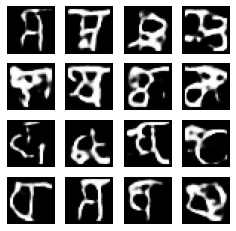

Time for epoch 7 is 19.360202074050903 sec


In [ ]:
print("training for ", EPOCHS, 'epochs')
train(train_dataset, EPOCHS)

Restore the latest checkpoint.

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Create a GIF


In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)

Use `imageio` to create an animated gif using the images saved during training.

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)